In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import h5py
import seaborn
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import pairwise_distances
import sys
sys.path.append("../")
from utils import l2_normalize, prewhiten, read_sampled_identities, plot_recall_vary_decoy, recall_given_dist, plot_topk
from PIL import Image
seaborn.set()

In [2]:
mode2ks = {
    "recall": [1, 5, 10, 50, 100],
    "discovery": [1, 5, 10, 100],
    "numids": [50, 100],
}
mode2colors = {
    "recall": ['#0017ad', '#2d67ed', '#37a0f0', '#37e6f0','#000000'],
    "discovery": ['#9c0000', '#c41010','#d64f1a','#eb8028'],
    "numids": ['#845ec2', '#d65db1', '#ff6f91', '#ff9671', '#ffc75f', '#f9f871']
}
attack2display = {
    "community_naive_random": "a randomly sampled lookup set vector",
    "community_naive_same": "the same photo of the protected universally",
    "community_naive_mean": "the mean of the lookup set",
    "community_sample_gaussian_model": "a sample from a Gaussian model"
}
mode2display = {
    "recall": "Recall",
    "discovery": "Discovery",
    "numids": "Identity Uniformity"
}



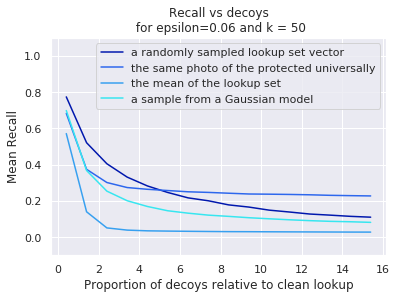

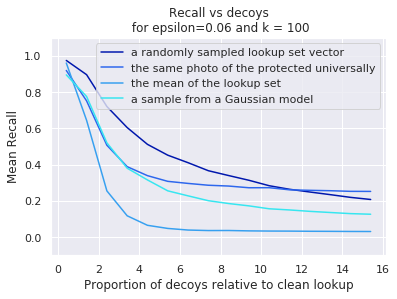

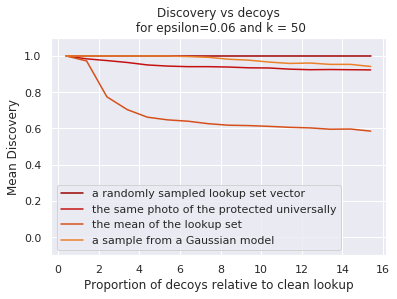

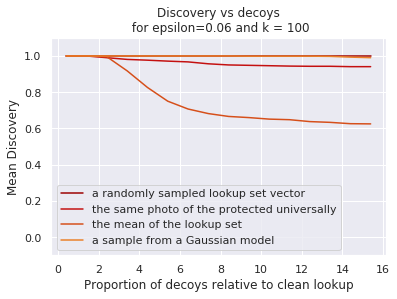

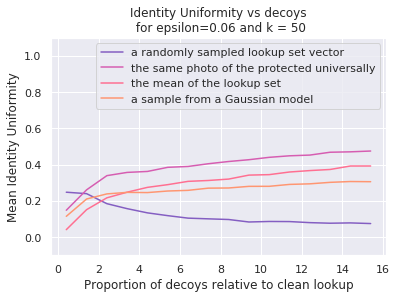

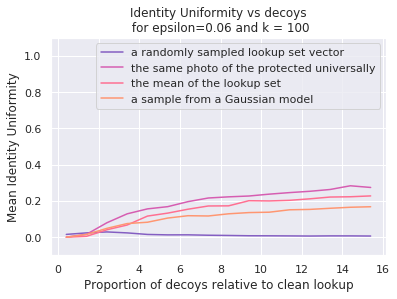

In [7]:
for mode in ["recall", "discovery", "numids"]:
    for k in [50, 100]:
        kwargs = {
            "attack_types": [k for k, v in attack2display.items()],
            "path_to_adversarial": "/data/vggface/test_perturbed_sampled/{true}/{attack_type}/{target}/epsilon_{epsilon}.h5",
            "path_to_clean": "/data/vggface/test_preprocessed_sampled/{id}/embeddings.h5",
            "epsilon": 0.06,
            "identities": read_sampled_identities("../sampled_identities.txt").keys(),
            "colors": mode2colors[mode],
            "names": [v for k, v in attack2display.items()],
            "clean_lookup_size": 50.0,
            "metric_name": mode2display[mode],
            "save_base": "/home/ivan/pascal_adversarial_faces/figures"
            
        }
        plot_recall_vary_decoy(
            k=k,
            mode=mode,
            sample_sizes=np.arange(20, 800, 50),
            **kwargs
        )

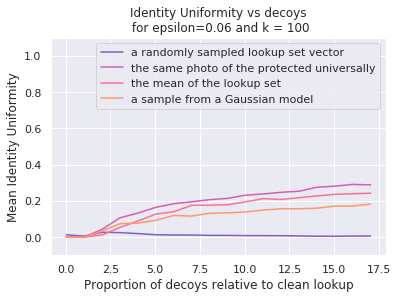

In [4]:
# kwargs = {
#     "attack_types": [k for k, v in attack2display.items()],
#     "path_to_adversarial": "/data/vggface/test_perturbed_sampled/{true}/{attack_type}/{target}/epsilon_{epsilon}.h5",
#     "path_to_clean": "/data/vggface/test_preprocessed_sampled/{id}/embeddings.h5",
#     "epsilon": 0.06,
#     "identities": read_sampled_identities("../sampled_identities.txt").keys(),
#     "colors": ['#845ec2', '#d65db1', '#ff6f91', '#ff9671', '#ffc75f', '#f9f871'],
#     "names": [v for k, v in attack2display.items()],
#     "clean_lookup_size": 50.0,
#     "metric_name": mode2display[mode],
#     "save_base": "/home/ivan/pascal_adversarial_faces/figures",
# }
# plot_recall_vary_decoy(
#     k=100,
#     mode="numids",
#     sample_sizes=np.arange(2, 900, 50),
#     **kwargs
# )

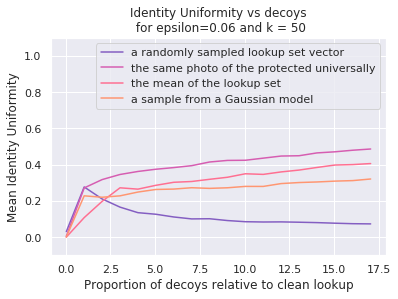

In [5]:
# kwargs = {
#     "attack_types": [k for k, v in attack2display.items()],
#     "path_to_adversarial": "/data/vggface/test_perturbed_sampled/{true}/{attack_type}/{target}/epsilon_{epsilon}.h5",
#     "path_to_clean": "/data/vggface/test_preprocessed_sampled/{id}/embeddings.h5",
#     "epsilon": 0.06,
#     "identities": read_sampled_identities("../sampled_identities.txt").keys(),
#     "colors": ['#845ec2', '#d65db1', '#ff6f91', '#ff9671', '#ffc75f', '#f9f871'],
#     "names": [v for k, v in attack2display.items()],
#     "clean_lookup_size": 50.0,
#     "metric_name": mode2display[mode],
#     "save_base": "/home/ivan/pascal_adversarial_faces/figures",
# }
# plot_recall_vary_decoy(
#     k=50,
#     mode="numids",
#     sample_sizes=np.arange(2, 900, 50),
#     **kwargs
# )

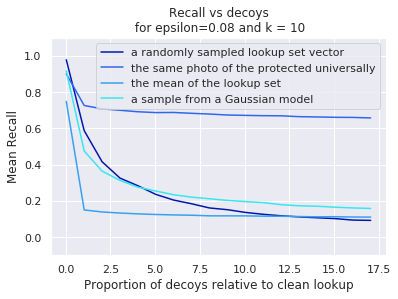

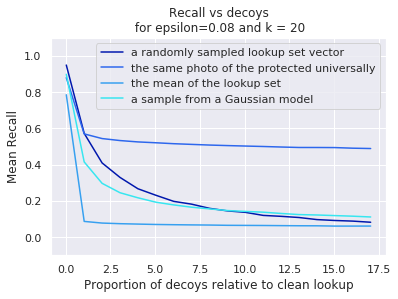

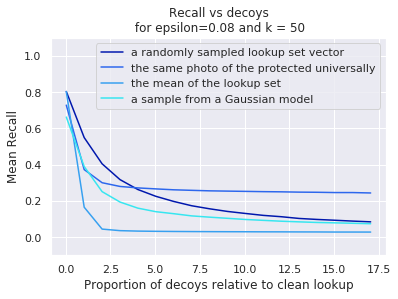

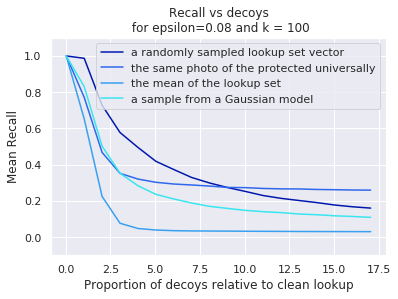

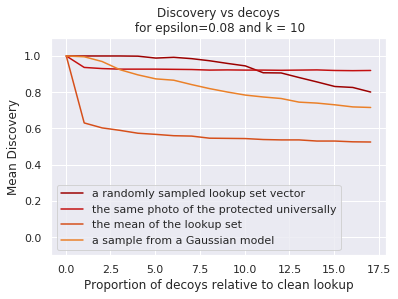

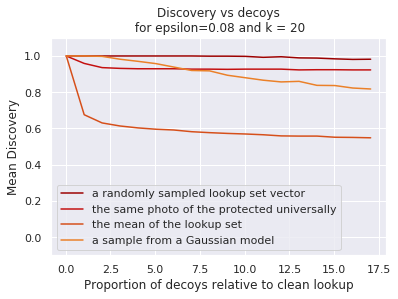

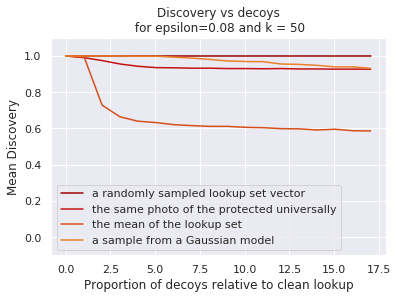

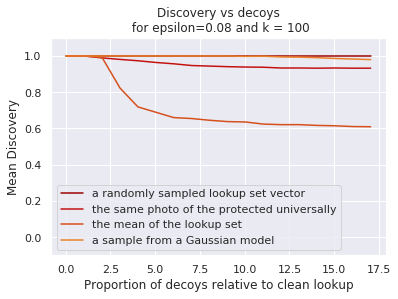

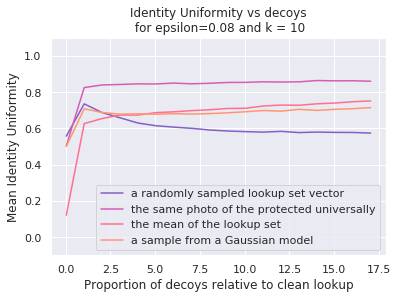

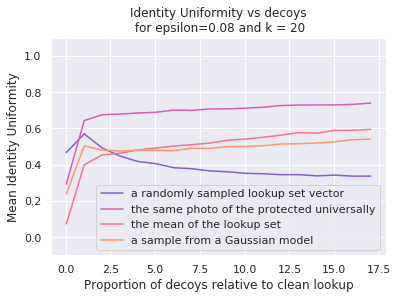

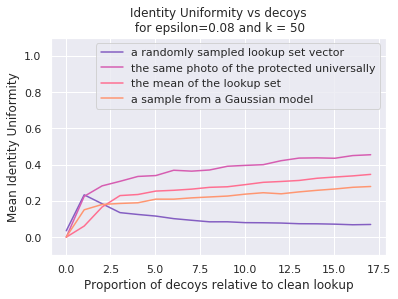

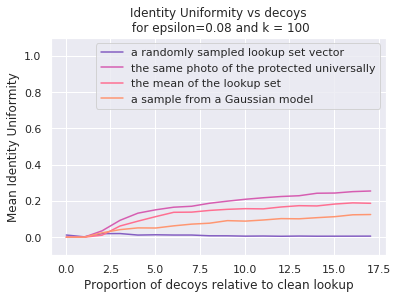

In [6]:
# for mode in ["recall", "discovery", "numids"]:
#     for k in [10, 20, 50, 100]:
#         kwargs = {
#             "attack_types": [k for k, v in attack2display.items()],
#             "path_to_adversarial": "/data/vggface/test_perturbed_sampled/{true}/{attack_type}/{target}/epsilon_{epsilon}.h5",
#             "path_to_clean": "/data/vggface/test_preprocessed_sampled/{id}/embeddings.h5",
#             "epsilon": 0.08,
#             "identities": read_sampled_identities("../sampled_identities.txt").keys(),
#             "colors": mode2colors[mode],
#             "names": [v for k, v in attack2display.items()],
#             "clean_lookup_size": 50.0,
#             "metric_name": mode2display[mode],
#             "save_base": "/home/ivan/pascal_adversarial_faces/figures",
#         }
#         plot_recall_vary_decoy(
#             k=k,
#             mode=mode,
#             sample_sizes=np.arange(2, 900, 50),
#             **kwargs
#         )